# Exploración de Datos y Predicción de falla cardíaca

Notebook de prueba para explorar y aprender el dataset sobre esta temática.

In [2]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
# probando

In [3]:
# Obtengo los datos y muestro las primeras 10 filas
dataset = './heart_failure_clinical_records_dataset.csv'
heart_data = pd.read_csv(dataset)
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Features

- `age`: Edad del paciente
- `anaemia`: Disminución de glóbulos rojos o hemoglobina (booleano)
- `creatinine_phosphokinase`: Nivel de enzimas CPK en sangre (mcg/L)
- `diabetes`: Si el paciente tiene/tuvo diabetes (booleano)
- `ejection_fraction`: Porcentaje de sangre que sale del corazón en cada contracción (porcentaje)
- `high_blood_pressure`: Si el paciente tiene hipertensión (booleano)
- `platelets`: Plaquetas en sangre (kiloplatelets/mL)
- `serum_creatinine`: Nivel de creatinina sérica en sangre (mg/dL)
- `serum_sodium`: Nivel de sodio serica en sangre (mEq/L)
- `sex`: Mujer u hombre (booleano)
- `smoking`: Si el paciente fuma o no (booleano)
- `time`: Periodo de seguimiento (días)
- `DEATH_EVENT`: Si el paciente falleció durante el periodo de seguimiento (booleano)

## Las patologías son un indicador de falla cardíaca?

In [10]:
pathologies_feat = ["anaemia", "diabetes", "high_blood_pressure", "smoking"]

def pathologies_cases(data, feature: str, event: int) -> list:
    data_feature = data[data["DEATH_EVENT"]==event][feature]
    idx = pd.Index(data_feature)
    return list(idx.value_counts())

p_surv = {f: pathologies_cases(data=heart_data, feature=f, event=0) for f in pathologies_feat}
p_dead = {f: pathologies_cases(data=heart_data, feature=f, event=1) for f in pathologies_feat}

In [9]:
p_dead

{'anaemia': [50, 46],
 'diabetes': [56, 40],
 'high_blood_pressure': [57, 39],
 'smoking': [66, 30]}

In [5]:
def plot_bar(data: dict, index: list) -> None:
    df_pathologies = pd.DataFrame(data, index=index)
    ax = df_pathologies.plot(kind='pie', rot=0, figsize=(20, 5), subplots=True, autopct='%1.1f%%', colors=['green', 'red'])

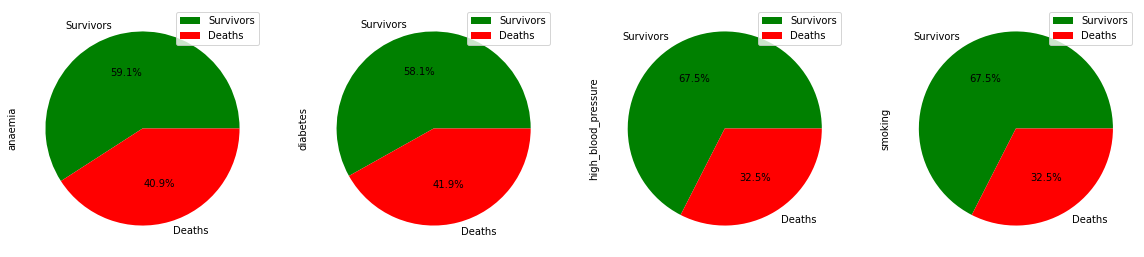

In [6]:
plot_bar(data=p_surv, index=['Survivors', 'Deaths'])

Matriz de Correlación

<AxesSubplot:>

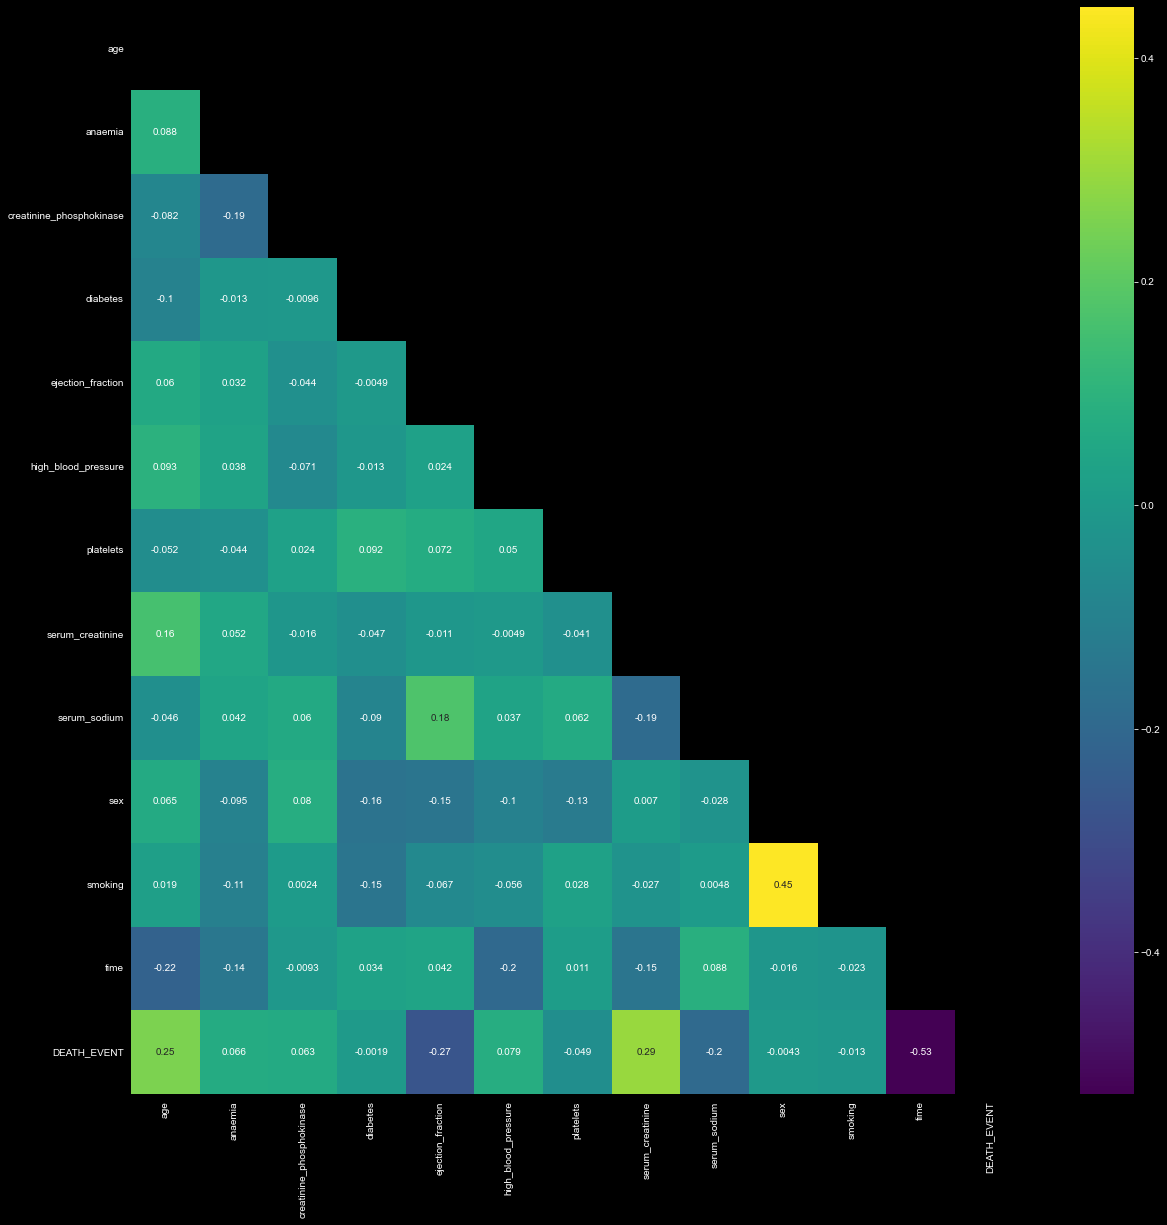

In [5]:
sns.set_style("dark")
plt.style.use("dark_background")
matrix_corr = heart_data.corr()
mask = np.zeros_like(matrix_corr)
mask[np.triu_indices_from(mask)] = True
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(matrix_corr,mask=mask,annot=True,cmap="viridis")

Relación Patologías con #Muertos

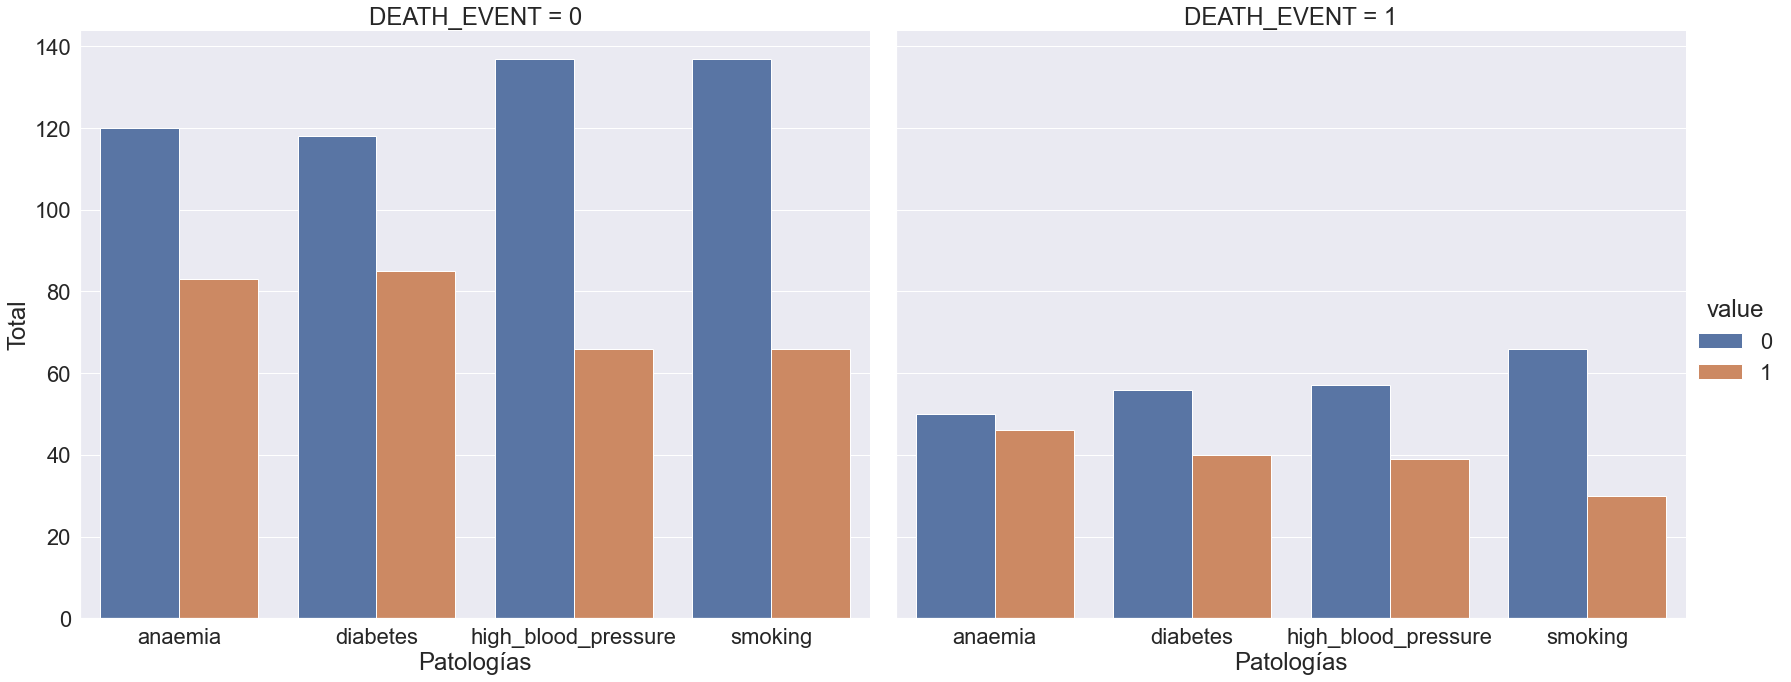

In [11]:
df = heart_data.copy()
df_pathologies = df.drop(columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'time'])
df_melted = pd.melt(df_pathologies,id_vars="DEATH_EVENT")
sns.set(font_scale = 2)
fig = sns.catplot(data=df_melted,hue="value",x="variable",col="DEATH_EVENT",kind="count",height=10,aspect=1.2)
fig.set_axis_labels("Patologías", "Total")

Distribución según cantidad de Patologías simultaneas

<Figure size 720x432 with 0 Axes>

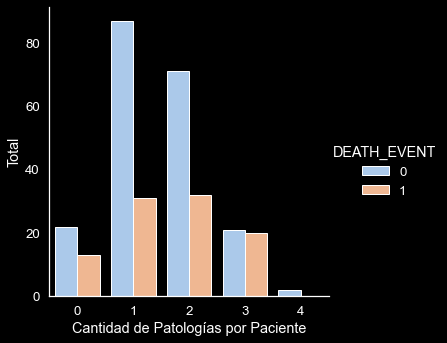

In [20]:
df_tendencia = df_pathologies.copy()
df_tendencia["#Pathologies"] = df["anaemia"]+df["diabetes"]+df["high_blood_pressure"]+df["smoking"]
df_tendencia.drop(columns=["anaemia","diabetes","high_blood_pressure","smoking"],inplace=True)
sns.set(font_scale = 1.2)
plt.figure(figsize=(10, 6))
sns.set_style("dark")
plt.style.use("dark_background")
fig = sns.catplot(data=df_tendencia,hue="DEATH_EVENT",x="#Pathologies",kind="count",height=5,palette="pastel")
fig.set_axis_labels("Cantidad de Patologías por Paciente", "Total")